## Animating horizontal bar chart

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

Read the data set

In [90]:
df = pd.read_csv('dff.csv', usecols=['name', 'group','value'])
df.sample(3)

,name,group,value
6,Cairo,Middle East,19849.6
5,Osaka,Asia,20409.0
9,Karachi,Asia,18185.2


Data Transformation

To obtain the top 10 values

In [91]:
dff = df.sort_values('value',ascending=False)
dff.head()

,name,group,value
0,Shanghai,Asia,25778.6
1,Beijing,Asia,22674.2
2,Mumbai,India,22120.0
3,Sao Paulo,Latin America,21697.8
4,Mexico City,Latin America,21520.4


Basic Horizontal Bar chart

<BarContainer object of 10 artists>

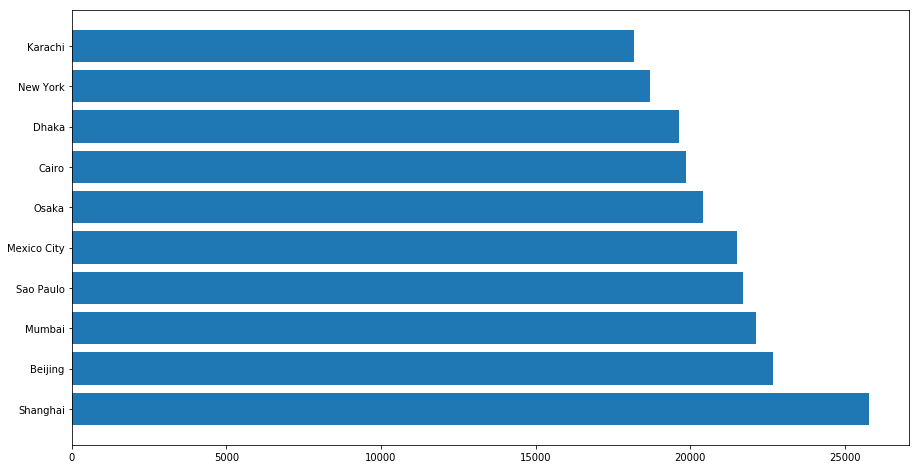

In [92]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

Color labels

In [93]:
colors = dict(zip(
    ['India', 'Europe', 'Asia', 'Latin America',
     'Middle East', 'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = df.set_index('name')['group'].to_dict()

group_lk is mapping between name and group values.

In [94]:
group_lk['Karachi']

'Asia'

The use of transform=ax.transAxes throughout the code indicates that the coordinates are given relative to the axes bounding box, with 0,0 being the lower left of the axes and 1,1 the upper right.

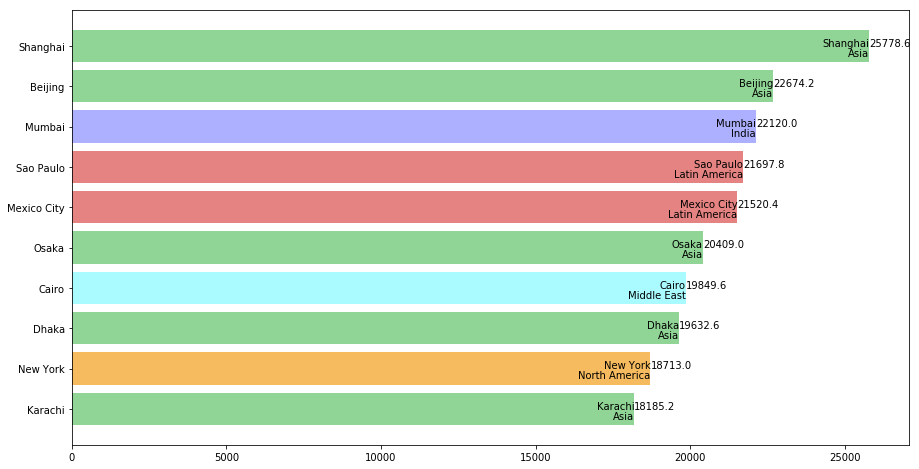

In [95]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            horizontalalignment='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  horizontalalignment='right')  # Asia: group name
    ax.text(value, i,     value,           horizontalalignment='left')   # 38194.2: value

In [96]:
dff['type']=10

In [97]:
dff

,name,group,value,type
9,Karachi,Asia,18185.2,10
8,New York,North America,18713.0,10
7,Dhaka,Asia,19632.6,10
6,Cairo,Middle East,19849.6,10
5,Osaka,Asia,20409.0,10
4,Mexico City,Latin America,21520.4,10
3,Sao Paulo,Latin America,21697.8,10
2,Mumbai,India,22120.0,10
1,Beijing,Asia,22674.2,10
0,Shanghai,Asia,25778.6,10


In [100]:
dff2 = dff[::-1].copy()
for i in range(1,10):
    a = dff[::-1]['value']*(10-i)/10
    s=dff[::-1].copy()
    s['value']=a
    s['type']=10-i
    dff2 = pd.concat([dff2,s])

In [101]:
dff2

,name,group,value,type
0,Shanghai,Asia,25778.60,10
1,Beijing,Asia,22674.20,10
2,Mumbai,India,22120.00,10
3,Sao Paulo,Latin America,21697.80,10
4,Mexico City,Latin America,21520.40,10
5,Osaka,Asia,20409.00,10
6,Cairo,Middle East,19849.60,10
7,Dhaka,Asia,19632.60,10
8,New York,North America,18713.00,10
9,Karachi,Asia,18185.20,10


Create a draw-chart function

In [106]:
def draw_barchart(type):
    dfx = dff2[dff2['type'].eq(type)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dfx['name'], dfx['value'], color=[colors[group_lk[x]] for x in df['name']])
    dx = dfx['value'].max() / 200
    for i, (value, name) in enumerate(zip(dfx['value'], dfx['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xlim(0,26000)
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    plt.box(False)

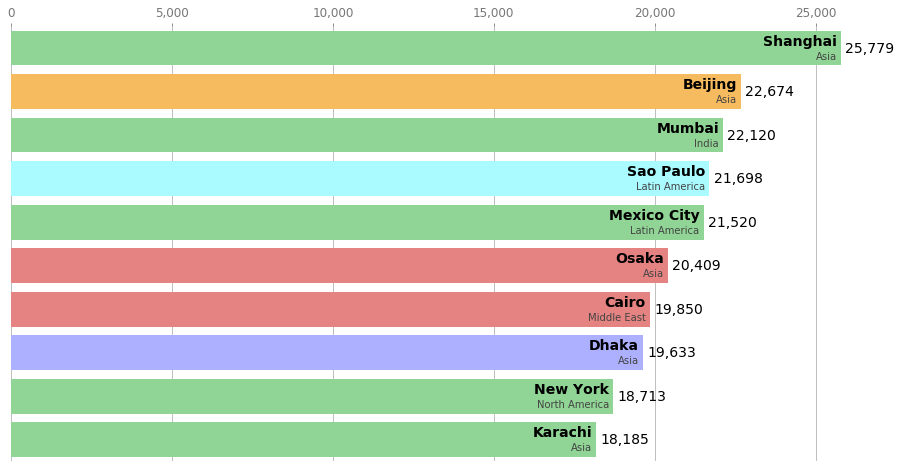

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(10)

Use FuncAnimation from matplotlib.animation to animate the graph

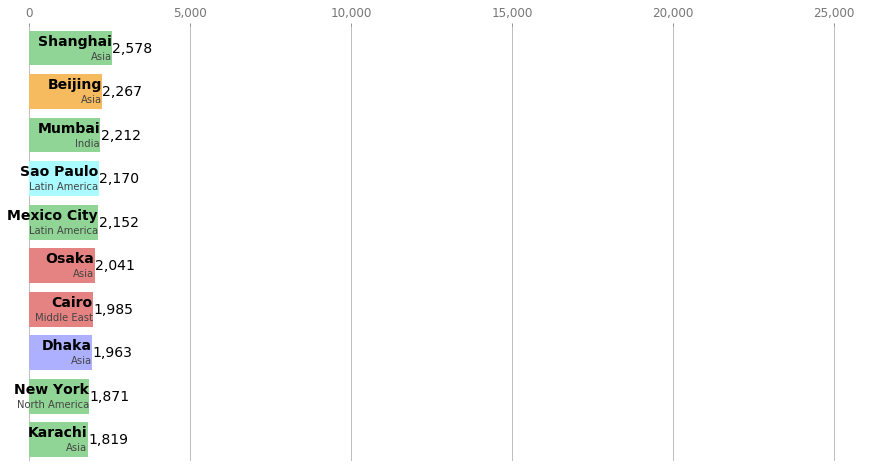

In [115]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, 11))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()